In [2]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [3]:
f = r.TFile("./data/60h/gm2offline_ana_28686415_15963.00282.root")
t = f.Get("farline/evwTree")
#t.Print()

---

### Lets calculate E_east vs E_west vs. time in fill and see if there is a big dependance on the slope thoughout the fill

In [6]:
fc = r.TFile("./data/60h/./EnergyEast_vs_EnergyWest_vs_Time.root")
fc.ls()
c = fc.Get("c1")
h = c.GetPrimitive("h").Clone("h")
h.SetDirectory(0)

TFile**		./data/60h/./EnergyEast_vs_EnergyWest_vs_Time.root	
 TFile*		./data/60h/./EnergyEast_vs_EnergyWest_vs_Time.root	
  KEY: TCanvas	c1;1	c1


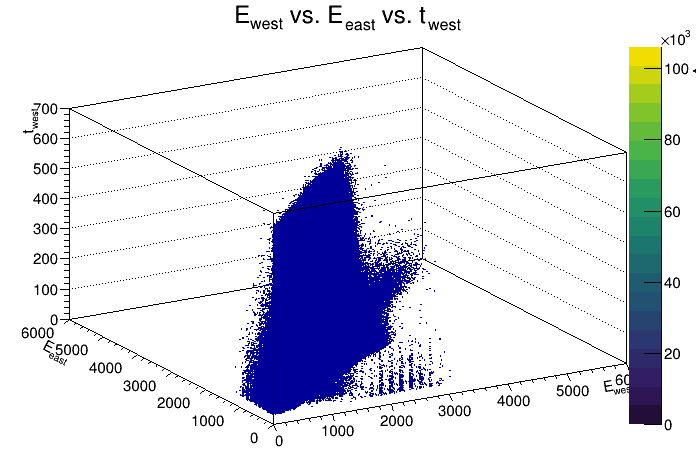

In [7]:
c = r.TCanvas()
h.Draw("lego2z")
c.Draw()

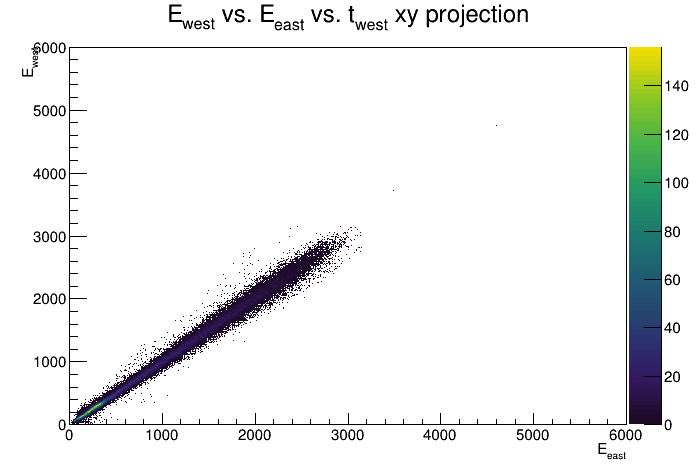

In [26]:
c = r.TCanvas()
h.GetXaxis().UnZoom()
h.GetYaxis().UnZoom()
h.Project3D("xy").Draw("colz")
c.Draw()

In [76]:
timeWidth = 100
startTime = 30
stepsize = 50 #mev

slopesByTimeBin = []

for ti in range(startTime, 700, timeWidth):
    h.GetZaxis().SetRangeUser(ti, ti+timeWidth)
    hi = h.Project3D("xy").Clone("h_"+str(ti))
    
    slopesi = []
    errsi = []
    xvals = []
    for i in range(100,3500,stepsize):
        actualslopeEnergyRange_Early = r.TF1("actualslopeEnergyRange_Early","pol1",i,i+stepsize)
        actualslopeEnergyRange_Early.FixParameter(0,0)
        hi.Fit(actualslopeEnergyRange_Early,"REMBQ")
        slopei = actualslopeEnergyRange_Early.GetParameter(1)
        erri = actualslopeEnergyRange_Early.GetParError(1)
        if(slopei > 0.0001):
            slopesi.append(slopei)
            errsi.append(erri)
        else:
            slopesi.append(np.nan)
            errsi.append(0)
        xvals.append(i+stepsize/2.0)
    slopesByTimeBin.append((ti, slopesi, errsi))
    

  FUNCTION VALUE DOES NOT SEEM TO DEPEND ON ANY OF THE 1 VARIABLE PARAMETERS.
          VERIFY THAT STEP SIZES ARE BIG ENOUGH AND CHECK FCN LOGIC.
 *******************************************************************************
 *******************************************************************************
  FUNCTION VALUE DOES NOT SEEM TO DEPEND ON ANY OF THE 1 VARIABLE PARAMETERS.
          VERIFY THAT STEP SIZES ARE BIG ENOUGH AND CHECK FCN LOGIC.
 *******************************************************************************
 *******************************************************************************


Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 


In [77]:
print(slopesi)

[0.9548090460087241, 0.9661192010139076, 0.9769109140702096, 0.9851793016557306, 0.9779178527071117, 0.9633221731489476, 0.9759941288673025, 0.976099153072256, 0.9810888381479168, 0.984897938289812, 0.9893960308946778, 0.9882150649247079, 0.9874199771636821, 0.989217119568627, 0.9885762253753188, 0.9894695803243466, 0.9913397685074563, 0.9929238130638018, 0.992148113634827, 0.9928465964765346, 0.9990535558755567, 0.9950240237755249, 0.9956571411308069, 0.9975033658979477, 0.9965769947509503, 0.9982662321953772, 0.9998262841274869, 1.0002538282575615, 1.0004341031678454, 1.0031245878713007, 1.0063981751381506, 1.005257817564196, 1.0032155719441398, 1.0020126290582436, 1.0022115815911643, 1.0067303700842096, 1.0046482428682313, 1.0032638394371916, 1.0036194689338025, 1.0037690845887224, 1.0002531343494059, 1.0015575604911982, 1.0019382394057934, 1.002388192168814, 0.999211255730282, 1.000673566746524, 0.9967837489526734, 1.0005845662941635, 1.0008634807379624, 0.9991784130705408, 1.00044

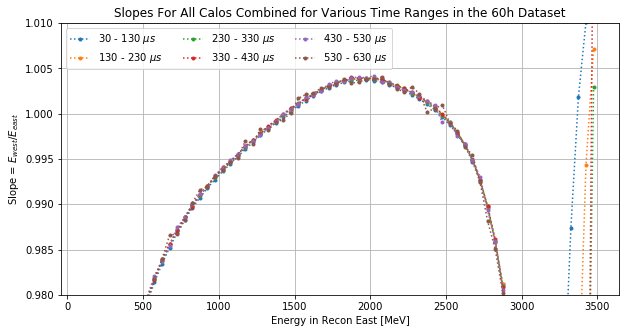

In [78]:
setint()
fig, ax = plt.subplots(figsize=(10,5))
for x in slopesByTimeBin:
    if(x[0] > 600):
        continue
    plt.plot(xvals, x[1],".:", label=str(x[0])+" - "+str(x[0]+timeWidth)+r" $\mu s$")
    #plt.errorbar(xvals, x[1],yerr=x[2],fmt=".:", label=str(x[0])+" - "+str(x[0]+timeWidth)+r" $\mu s$")
plt.legend(ncol=3)
plt.grid()
plt.title("Slopes For All Calos Combined for Various Time Ranges in the 60h Dataset")
plt.xlabel("Energy in Recon East [MeV]")
plt.ylabel(r"Slope = $E_{west}/E_{east}$")
plt.ylim(0.98,1.01)
plt.show()

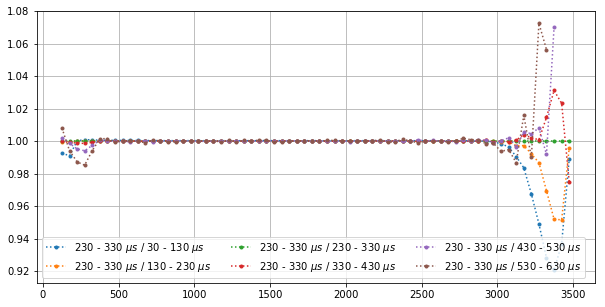

In [82]:
setint()
referenceRun = 2
fig, ax = plt.subplots(figsize=(10,5))
for i, x in enumerate(slopesByTimeBin):
    if(x[0] > 600):
        continue
    xi = [x1/x2 for (x1,x2) in zip(slopesByTimeBin[referenceRun][1], x[1])]
    plt.plot(xvals,xi,".:",
             label=str(slopesByTimeBin[referenceRun][0])+" - "+str(slopesByTimeBin[referenceRun][0]+timeWidth)+r" $\mu s$ / "+str(x[0])+" - "+str(x[0]+timeWidth)+r" $\mu s$")
plt.grid()
#plt.ylim(0.999,1.0002)
plt.legend(ncol=3)
plt.show()

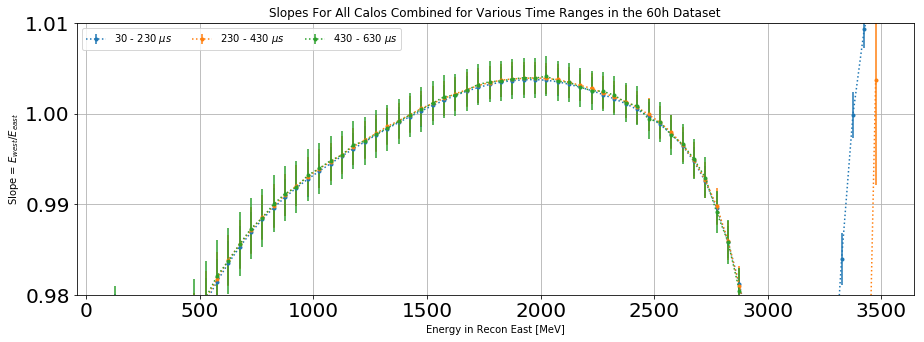

In [65]:
noint()
fig, ax = plt.subplots(figsize=(15,5))
for x in slopesByTimeBin:
    if(x[0] > 600):
        continue
    #plt.plot(xvals, x[1],".:", label=str(x[0])+" - "+str(x[0]+timeWidth)+r" $\mu s$")
    plt.errorbar(xvals, x[1],yerr=x[2],fmt=".:", label=str(x[0])+" - "+str(x[0]+timeWidth)+r" $\mu s$")
plt.legend(ncol=3)
plt.grid()
plt.title("Slopes For All Calos Combined for Various Time Ranges in the 60h Dataset")
plt.xlabel("Energy in Recon East [MeV]")
plt.ylabel(r"Slope = $E_{west}/E_{east}$")
plt.ylim(0.98,1.01)
plt.show()